In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.options.display.float_format = "{:8f}".format

### kmeans에 대한 원리를 이해하고 실제 거리 기반이라는 것을 확인했다.
- Why kmeans 부터 시작을 하는가?
- 알고리즘에서 가장 쉽고 이해가 빠른 것이 이런 거리기반으로 진행하는 것들
- 다른 알고리즘과 다르게 거리기반이라는 것을 이해하면 새로운 알고리즘을 배울 때 우리가 고민하고 과제를 했던 방식을 기반으로
- 원리를 이해하려고 하면 다른 알고리즘도 쉽게 이해가 될 것

In [2]:
df = pd.read_csv("wine_test.csv")

In [3]:
df

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0,14.230000,1.710000,2.430000,15.600000,127,2.800000,3.060000,0.280000,2.290000,5.640000,1.040000,3.920000,1065,0
1,1,NaN,1.780000,2.140000,11.200000,100,2.650000,2.760000,0.260000,1.280000,4.380000,1.050000,3.400000,1050,0
2,2,13.160000,2.360000,2.670000,18.600000,101,2.800000,3.240000,0.300000,2.810000,5.680000,1.030000,3.170000,1185,0
3,3,14.370000,1.950000,2.500000,16.800000,113,3.850000,3.490000,0.240000,2.180000,7.800000,0.860000,3.450000,1480,0
4,4,13.240000,2.590000,2.870000,21.000000,118,2.800000,2.690000,0.390000,1.820000,4.320000,1.040000,2.930000,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.710000,5.650000,2.450000,20.500000,95,1.680000,0.610000,0.520000,1.060000,7.700000,0.640000,1.740000,740,2
174,174,13.400000,3.910000,2.480000,23.000000,102,1.800000,0.750000,0.430000,1.410000,7.300000,0.700000,1.560000,750,2
175,175,13.270000,4.280000,2.260000,20.000000,120,1.590000,0.690000,0.430000,1.350000,10.200000,0.590000,1.560000,835,2
176,176,13.170000,2.590000,2.370000,20.000000,120,1.650000,0.680000,0.530000,1.460000,9.300000,0.600000,1.620000,840,2


In [4]:
df.columns

Index(['Unnamed: 0', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [5]:
df_sp = df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']]

In [6]:
df_sp.dropna(inplace=True)

C:\Users\doram\AppData\Local\Temp\ipykernel_18708\2101497962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp.dropna(inplace=True)


- 군집에 대한 형성의 기준
- 어떤 기준으로 잘 군집이 형성되었는지 확인할 수 있는가?
- 기준점, 즉 잘한 척도 (기준이 될 수 있는)
- 군집에 대한 평가를 하기 위해선 크게 3가지 정도를 확인하면 좋다. (k-means 기반)
- 1. 시각화를 해야 한다. (군집이 없는 상태, 즉 정답이 없는 상태에서 데이터에 대한 분포를 확인해야 한다.)
- 그럼 분포에 대해서 어떤 변수를 사용해야 하는가?
- 2. 엘보우 함수 이용
- 3. 실루엣 계수 이용


- 총 이 3가지를 기반으로 군집에 대한 기준과 개수를 정할 수 있다.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df_sp)
pd.DataFrame(df_scaled)
df_sc_sp = pd.DataFrame(df_scaled, columns=df_sp.columns)

In [9]:
df_sc_sp

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.526314,-0.570896,0.207821,-1.197696,2.011511,0.815449,1.031696,-0.661032,1.250922,0.220153,0.358111,1.851006,1.008751
1,0.181214,0.004191,1.080798,-0.290672,0.110729,0.815449,1.210480,-0.502496,2.170422,0.237375,0.314834,0.797571,1.388225
2,1.702309,-0.358556,0.462439,-0.834887,0.988013,2.492967,1.458791,-0.978105,1.056412,1.150115,-0.420876,1.190854,2.321099
3,0.281782,0.207683,1.808278,0.434947,1.353548,0.815449,0.664196,0.210918,0.419835,-0.348157,0.358111,0.460472,-0.034804
4,1.488601,-0.526658,0.280569,-1.318633,0.914906,1.566338,1.359467,-0.185423,0.685075,0.698050,0.401388,0.348106,2.226231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.872621,2.915013,0.280569,0.283777,-0.327913,-0.973904,-1.401752,1.241406,-0.924050,1.107061,-1.372971,-1.210978,-0.018992
167,0.482919,1.375551,0.389691,1.039630,0.183836,-0.782188,-1.262698,0.527991,-0.305156,0.934846,-1.113309,-1.463802,0.012631
168,0.319495,1.702908,-0.410537,0.132606,1.499762,-1.117691,-1.322293,0.527991,-0.411252,2.183406,-1.589356,-1.463802,0.281425
169,0.193785,0.207683,-0.010423,0.132606,1.499762,-1.021833,-1.332225,1.320674,-0.216742,1.795922,-1.546079,-1.379527,0.297236


### 시각화를 어떻게 할 것인가?
- 데이터 분포에 대한 시각화

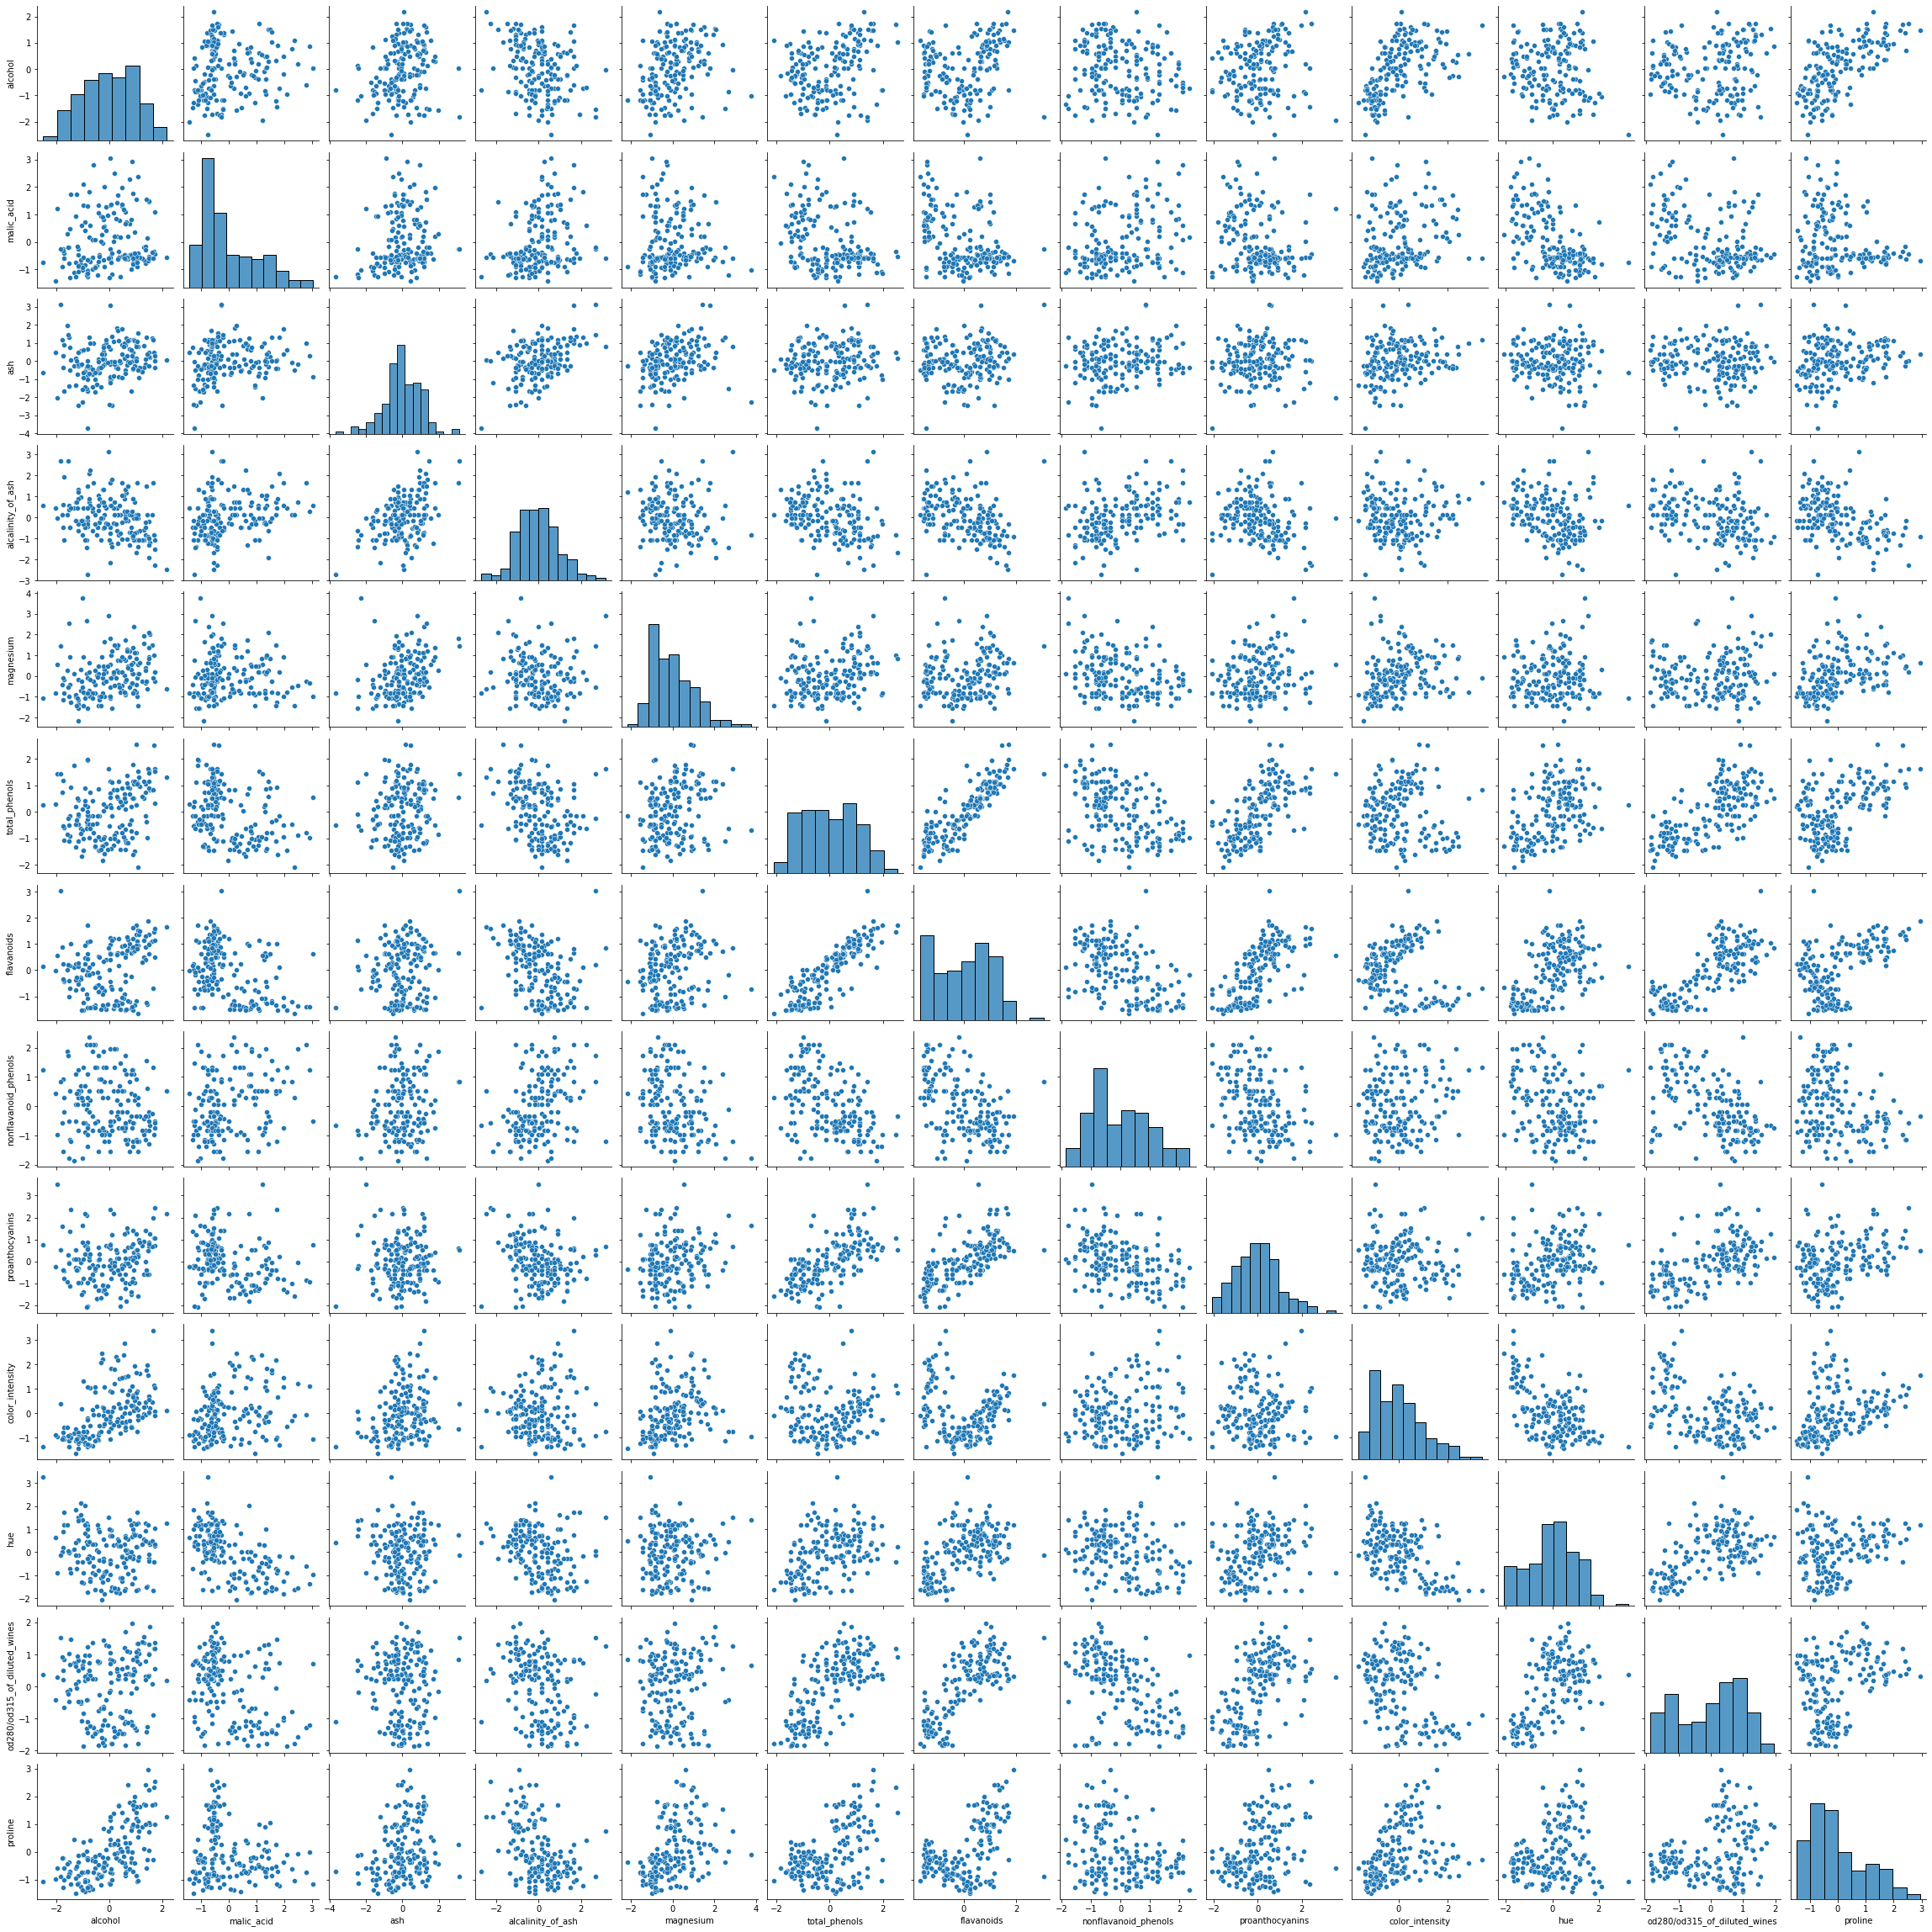

In [10]:
sns.pairplot(df_sc_sp)

- 컬럼에 대한 선정 기준을 정해야 한다.
- 모든 컬럼을 다 넣어서 비지도 학습을 하는 건 차원의 저주가 정확하게 적용되는 것

### 엘보우 점수
- 군집에 대해서 거리 기반으로 평가하는 것

In [11]:
def change_n_cluster(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        print(kmeans.inertia_)
        
    plt.figure(1, figsize=(15,8))
    plt.plot(n_clusters, sum_of_squared_distance, "*")
    plt.plot(n_clusters, sum_of_squared_distance, "-", alpha=0.5)
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")

In [12]:
n_clusters = [2,3,4,5,6,7,8]

1588.220143510189
1218.002895939455
1124.2380041571523
1055.753631803017
1002.416413125607
957.8820496197341
911.7956611611728


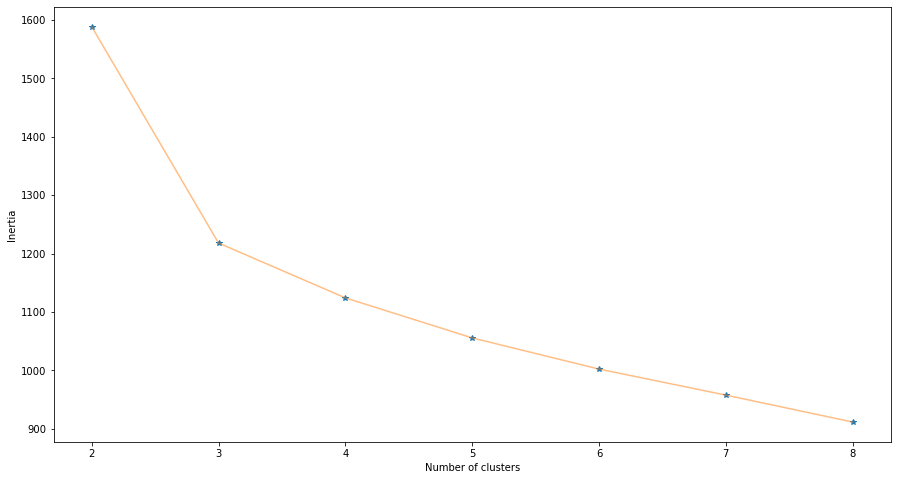

In [13]:
change_n_cluster(n_clusters, df_scaled)

- 이 엘보우 포인트만 보면 애매한 부분이 있다.
- 3번째인가? 4번째일 수 있고
- 학습을 위한 데이터라 정말 예쁘게 엘보우가 나왔다.
- 추가적으로 평가할 수 있는 실루엣 계수를 뽑는 것

### 필수과제1
- kmeans의 군집화의 inertia값이 의미하는 것이 어떤 것인지?
- 구체적으로 개념을 정리하고, 실제 시각화 코드를 통해서 인사이트를 도출해보기!

### 실루엣 계수

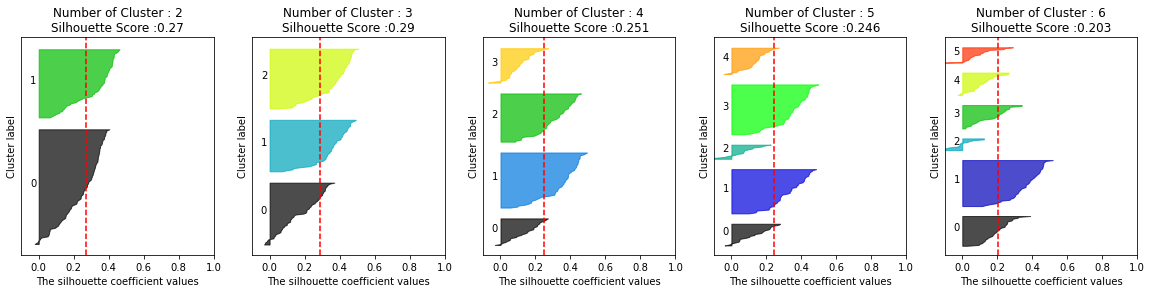

In [14]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


visualize_silhouette([2,3,4,5,6], df_scaled)

- 기본적으로 실루엣 스코어에 대한 지표를 확인하고 점수가 높을수록 군집이 잘 되어있다는 뜻
- 실루엣 스코어만 보고 판단하지 말고 각 군집에 대한 실루엣 개수의 분포도 잘 봐야 한다.
- 실루엣 분석이란 건 결국 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지 나타내는 것
- 효율적으로 잘 분리되어 있다는 뜻은 다른 군집과의 거리는 멀리 떨어져 있고, 나의 군집 내에서의 거리는 가깝게 잘 뭉쳐져 있다라는 뜻
- 군집화가 잘 되어있다는 뜻은 군집마다 잘 뭉쳐져 있는 클러스터링이 되어 있다는 뜻, 다른 군집과 비교했을 때 잘 눈으로 보여지는 것

In [15]:
df_scaled

array([[ 1.52631422, -0.57089554,  0.20782113, ...,  0.35811132,
         1.85100599,  1.00875071],
       [ 0.18121398,  0.00419091,  1.0807975 , ...,  0.31483426,
         0.79757125,  1.38822501],
       [ 1.70230865, -0.35855593,  0.46243924, ..., -0.4208757 ,
         1.19085355,  2.32109935],
       ...,
       [ 0.31949531,  1.70290782, -0.41053713, ..., -1.58935623,
        -1.46380198,  0.28142495],
       [ 0.19378501,  0.20768304, -0.01042296, ..., -1.54607917,
        -1.3795272 ,  0.29723638],
       [ 1.40060392,  1.54365311,  1.33541561, ..., -1.50280212,
        -1.4076188 , -0.58820367]])

In [16]:
kmeans = KMeans(n_clusters=3, random_state=111)
clusters = kmeans.fit(df_sc_sp)

In [17]:
df_sc_sp["cluster"] = clusters.labels_

In [18]:
df_sc_sp

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,1.526314,-0.570896,0.207821,-1.197696,2.011511,0.815449,1.031696,-0.661032,1.250922,0.220153,0.358111,1.851006,1.008751,0
1,0.181214,0.004191,1.080798,-0.290672,0.110729,0.815449,1.210480,-0.502496,2.170422,0.237375,0.314834,0.797571,1.388225,0
2,1.702309,-0.358556,0.462439,-0.834887,0.988013,2.492967,1.458791,-0.978105,1.056412,1.150115,-0.420876,1.190854,2.321099,0
3,0.281782,0.207683,1.808278,0.434947,1.353548,0.815449,0.664196,0.210918,0.419835,-0.348157,0.358111,0.460472,-0.034804,0
4,1.488601,-0.526658,0.280569,-1.318633,0.914906,1.566338,1.359467,-0.185423,0.685075,0.698050,0.401388,0.348106,2.226231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.872621,2.915013,0.280569,0.283777,-0.327913,-0.973904,-1.401752,1.241406,-0.924050,1.107061,-1.372971,-1.210978,-0.018992,2
167,0.482919,1.375551,0.389691,1.039630,0.183836,-0.782188,-1.262698,0.527991,-0.305156,0.934846,-1.113309,-1.463802,0.012631,2
168,0.319495,1.702908,-0.410537,0.132606,1.499762,-1.117691,-1.322293,0.527991,-0.411252,2.183406,-1.589356,-1.463802,0.281425,2
169,0.193785,0.207683,-0.010423,0.132606,1.499762,-1.021833,-1.332225,1.320674,-0.216742,1.795922,-1.546079,-1.379527,0.297236,2


### 군집별로 시각화를 어떻게 할 것인가?
- 차원축소의 개념
- pca 두 개의 축으로 나눠서 가장 데이터 특성을 나타내는 변수로 차원을 축소하는 것

In [19]:
df_sc_sp.columns # 10개가 넘음

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'cluster'],
      dtype='object')

- pca 주성분에 대한 값을 확인해야 하지만
- 지금은 kmeans에 학습을 위해서 일단은 2차원으로 축소를 해서 그래프를 그려보겠음!

In [20]:
from sklearn.decomposition import PCA

In [21]:
df_scaled

array([[ 1.52631422, -0.57089554,  0.20782113, ...,  0.35811132,
         1.85100599,  1.00875071],
       [ 0.18121398,  0.00419091,  1.0807975 , ...,  0.31483426,
         0.79757125,  1.38822501],
       [ 1.70230865, -0.35855593,  0.46243924, ..., -0.4208757 ,
         1.19085355,  2.32109935],
       ...,
       [ 0.31949531,  1.70290782, -0.41053713, ..., -1.58935623,
        -1.46380198,  0.28142495],
       [ 0.19378501,  0.20768304, -0.01042296, ..., -1.54607917,
        -1.3795272 ,  0.29723638],
       [ 1.40060392,  1.54365311,  1.33541561, ..., -1.50280212,
        -1.4076188 , -0.58820367]])

In [22]:
X = df_scaled.copy()

# PCA 적용
pca = PCA(n_components = 2)
pca.fit(X)

x_pca = pca.transform(X)
x_pca

array([[ 3.35515902, -1.45980198],
       [ 2.5582972 , -0.96667468],
       [ 3.79940306, -2.72492275],
       [ 1.06189271, -0.87291302],
       [ 3.08438269, -2.08632629],
       [ 2.47898664, -1.11395313],
       [ 2.09514994, -1.61401437],
       [ 2.77120098, -0.73926074],
       [ 3.50243604, -1.24965769],
       [ 1.76950829, -0.55694   ],
       [ 2.13114742, -0.59364777],
       [ 3.49002537, -1.03844615],
       [ 4.34297405, -2.01427422],
       [ 2.33284376, -1.62569353],
       [ 2.22014783, -2.31951624],
       [ 1.93877178, -1.61334418],
       [ 3.56822907, -2.45545721],
       [ 2.1152579 , -1.05748031],
       [ 3.1534477 , -0.81285406],
       [ 1.12499547, -0.2005749 ],
       [ 2.55298694,  0.12691561],
       [ 1.65943159,  0.56464896],
       [ 1.78718411,  0.35744389],
       [ 1.05509634, -0.95428208],
       [ 1.80178533, -0.62229569],
       [ 1.24448388,  0.13807472],
       [ 2.22688017, -0.66010352],
       [ 2.27707453, -0.14672188],
       [ 2.53733913,

In [23]:
pca_df = pd.DataFrame(x_pca)

In [24]:
pca_df["cluster"] = df_sc_sp["cluster"]

In [25]:
pca_df

,0,1,cluster
0,3.355159,-1.459802,0
1,2.558297,-0.966675,0
2,3.799403,-2.724923,0
3,1.061893,-0.872913,0
4,3.084383,-2.086326,0
...,...,...,...
166,-3.296368,-2.166201,2
167,-2.536557,-1.732327,2
168,-2.609659,-2.767065,2
169,-2.319116,-2.308632,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


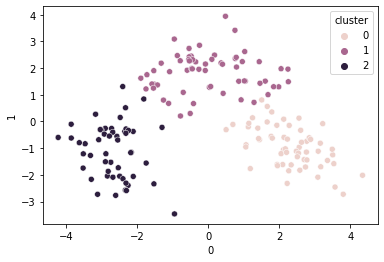

In [26]:
axs = plt.subplots()
axs = sns.scatterplot(0, 1, hue="cluster", data=pca_df)

In [27]:
pca_df.groupby(["cluster"]).agg(mean_0=(0, "mean"), mean_1=(1, "mean"))

,mean_0,mean_1
cluster,,
0,2.299451,-0.935376
1,0.003868,1.823008
2,-2.664775,-1.098360


### 필수과제2
- NH고객데이터의 군집에 대한 평가를 진행 후 적정 군집에 대한 기준을 선정해 주세요. (필수)
- 모든 변수를 다 사용해도 되고, 피처에 대한 중요성을 확인해서 변수를 먼저 추출하고 난 후에 진행해도 됩니다. (피처에 대한 중요도는 자율로 진행해 주세요!)
- 오늘 배운 군집화를 진행하는 과정에서의 근기들은 꼭 다 코드로 작성해주셔야 합니다. (필수)


- 필수적으로 공유해야 하는 것
- 1. 군집의 개수를 선정한 기준에 대한 설명 및 코드 (주석 필수)
- 2. 해당 군집에 대한 특성 비교
- 3. 군집에 대한 인사이트를 통해서 마케팅이건, 세일즈건 어떤 전략을 펼칠 수 있는지?
- (단순하게 나열 형식으로 투자성향이 높은 사람은 무엇을 해야 한다 이런 식보다는 좀 더 데이터 근거 + 외부나 비정형데이터를 통해서 같이 전략을 제안하는 것)

- 과제에 대한 제출 가이드
- 복습 과제는 예외가 없습니다. 동일한 기준
- 필수과제는 시험기간이기 때문에 시험 기간 끝나고 휴회기간 후 첫 수업하는 날까지 올려주시면 됩니다.